In [1]:
%matplotlib inline

In [2]:
import time
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from IPython import display
from ipywidgets import interactive

In [3]:
# Perceptron


class Network:
    def __init__(self, num_inputs: int, activation_fn: Callable[[float], float]):
        self.num_inputs = num_inputs
        self.fn = activation_fn
        self.weights = np.zeros(num_inputs)  # zero initialization
        self.bias = 1  # zero initialization
        self.learning_rate = 0.0001

    def forward(self, inputs: npt.ArrayLike) -> float:
        return self.fn(np.dot(inputs, self.weights) + self.bias)

    def train(self, inputs: npt.ArrayLike, target: float) -> float:
        prediction = self.forward(inputs)
        error = target - prediction
        for i in range(len(inputs)):
            self.weights += self.learning_rate * error[i] * inputs[i]
        self.bias += self.learning_rate * np.mean(error)
        return np.mean(np.abs(error))


def binary_step(xs: npt.ArrayLike) -> npt.ArrayLike:
    return np.where(xs >= 0, 1, 0)

In [4]:
np.random.seed(0)
net = Network(2, binary_step)
X = np.random.uniform(-1, 1, (100, 2))


def decision_boundary(X: npt.NDArray, y: npt.NDArray) -> tuple[npt.NDArray, npt.NDArray, npt.NDArray]:
    x = np.linspace(-1, 1, 100)
    y = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = net.forward(np.array([X[i, j], Y[i, j]]))

    return X, Y, Z


def update(skew: float = 0, w0: float = 0.0, w1: float = 0.0, bias: float = 0.0) -> None:
    net.bias = bias
    net.weights[0] = w0
    net.weights[1] = w1

    y = np.zeros(100)
    y[X[:, 0] + X[:, 1] + skew > 0] = 1

    plt.scatter(X[y == 0, 0], X[y == 0, 1], color="blue")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color="red")

    Xd, Yd, Zd = decision_boundary(X, y)
    plt.contourf(Xd, Yd, Zd, levels=[-1, 0, 1], alpha=0.3)

    plt.show()


interactive(update, skew=(-2.0, 2.0), w0=(-1.0, 1.0), w1=(-1.0, 1.0), bias=(-1.0, 1.0))

interactive(children=(FloatSlider(value=0.0, description='skew', max=2.0, min=-2.0), FloatSlider(value=0.0, de…

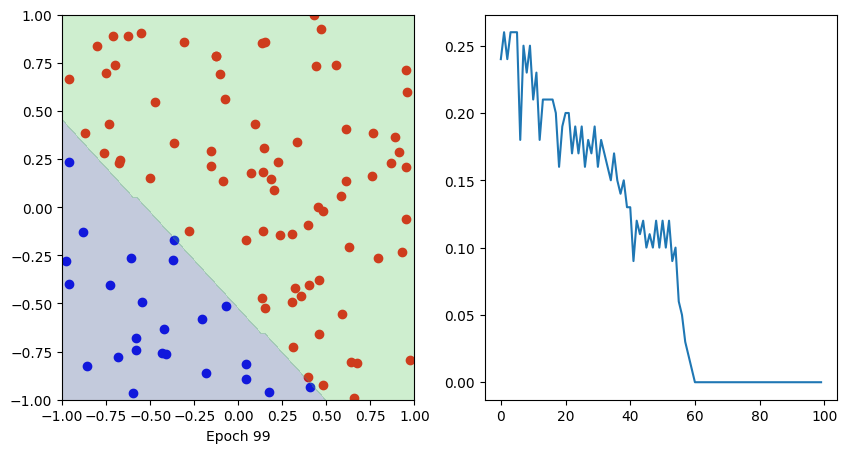

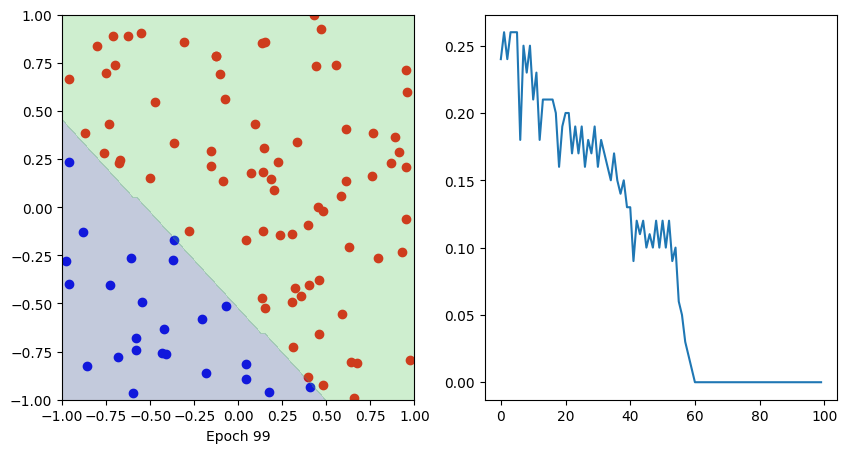

In [5]:
# Interactive training

np.random.seed(0)
X = np.random.uniform(-1, 1, (100, 2))
y = np.zeros(100)
y[X[:, 0] + X[:, 1] + 0.5 > 0] = 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


errors = []
for i in range(100):
    errors.append(net.train(X, y))

    Xd, Yd, Zd = decision_boundary(X, y)

    ax1.clear()
    ax1.scatter(X[y == 0, 0], X[y == 0, 1], color="blue")
    ax1.scatter(X[y == 1, 0], X[y == 1, 1], color="red")
    ax1.contourf(Xd, Yd, Zd, levels=[-1, 0, 1], alpha=0.3)

    ax2.clear()
    ax2.plot(errors)

    ax1.set_xlabel(f"Epoch {i}")

    display.clear_output(wait=True)
    display.display(fig)
    time.sleep(0.1)